# Titanic Dataset: Exploratory Data Analysis (EDA)

**Author:** Elen Tesfai  
**Date:** 07/04/2025  
**Objective:** To analyze the Titanic dataset and explore factors influencing passenger survival.

---

This notebook conducts an **Exploratory Data Analysis (EDA)** on the Titanic dataset, with the primary goal of understanding the data through statistical analysis and visualizations.

The analysis will focus on:
- Distribution of numerical and categorical features.
- Key correlations between features.
- Missing data handling.
- Visualizations that provide insights into the Titanic tragedy, such as survival rates across gender, class, and age.

### Dataset Overview:
The dataset includes various passenger features like survival status, age, class, gender, ticket fare, and embarkation port. The goal is to analyze these features to understand patterns that could have impacted survival chances.

### Source:
Dataset from Kaggle: [**Titanic: Machine Learning from Disaster**](https://www.kaggle.com/c/titanic)

---

## Step 1: Data Acquisition

The data for this analysis comes from the Titanic dataset, which is available on Kaggle.

We have the following datasets:
- `train.csv` - Training data, including survival status and other features.
- `test.csv` - Test data, for which we need to predict the survival status.

In [9]:
import pandas as pd

# Load the data from the 'data/' folder
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# Show the first few rows of the dataset to confirm successful loading
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Initial Data Inspection

In this section, we will inspect the data to check the following:
- The number of rows and columns
- The data types of each column
- Any missing values

In [11]:
# Check the shape of the dataset
train_data.shape

# Check the data types of the columns
train_data.dtypes

# Check for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Explanation of Initial Data Inspection and Handling Missing Values for Step 2

- **Dataset Shape**: The number of rows and columns is checked to understand the dataset's size.
- **Data Types**: We check the data types of each column to ensure they are appropriate for analysis.
- **Missing Values**: We identify missing values across the dataset.
  - **Age** has 177 missing values, which will be filled with the **median**.
  - **Cabin** has 687 missing values, which will be dropped due to the high percentage of missing data.
  - **Embarked** has 2 missing values, which will be filled with the **mode** (most frequent value).

Handling missing values is essential to avoid biased or incomplete analysis in **Step 2**.

## Step 3: Initial Descriptive Statistics

Let's compute the basic descriptive statistics of the numerical columns, including:
- Mean
- Standard deviation
- Minimum and Maximum values
- Quartiles (25%, 50%, 75%)

In [12]:
import pandas as pd

# Load the data
train_data = pd.read_csv('data/train.csv')

# Compute the descriptive statistics for numerical columns
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Step 4: Initial Data Distribution for Numerical Columns

We will visualize the distribution of numerical features using histograms to understand their distributions.

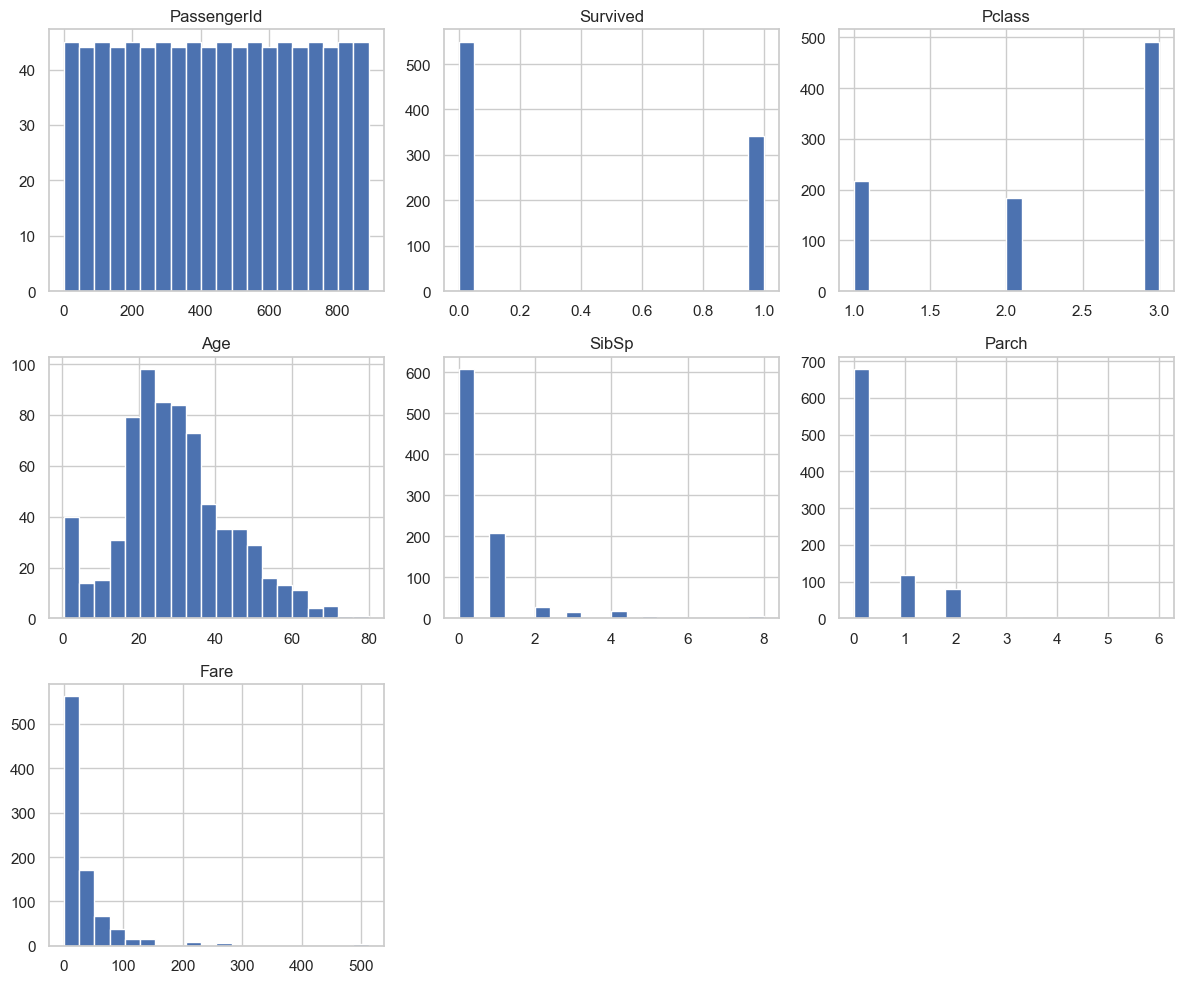

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the data folder
train_data = pd.read_csv('data/train.csv')

# Plot histograms for numerical columns
train_data.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

## Step 5: Initial Data Distribution for Categorical Columns

We will now visualize the distribution of categorical variables using bar plots.

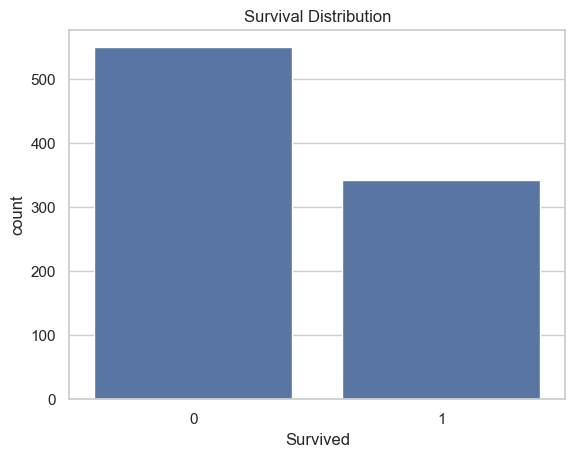

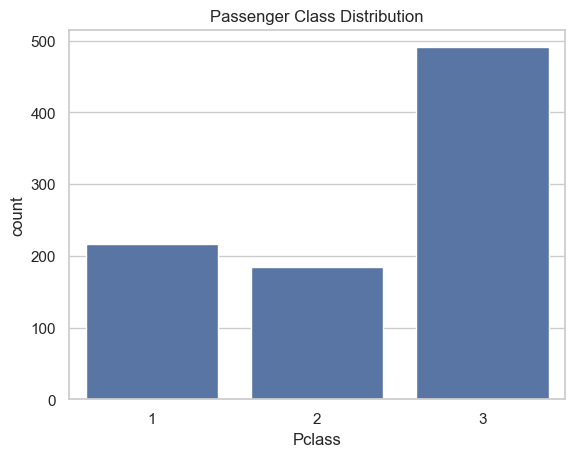

In [16]:
# Load the data from the data folder
train_data = pd.read_csv('data/train.csv')

# Bar plot for 'Survived' column
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Distribution')
plt.show()

# Bar plot for 'Pclass' column
sns.countplot(x='Pclass', data=train_data)
plt.title('Passenger Class Distribution')
plt.show()

## Step 6: Initial Data Preparation

In this section, we prepare the data for analysis and model building. This includes:
- Handling missing values
- Encoding categorical variables
- Creating new features if needed

In [17]:
# Load the data from the data folder
train_data = pd.read_csv('data/train.csv')

# Fill missing values or drop them (example for 'Age' column)
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Convert categorical columns to numeric (e.g., 'Sex' column)
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# Check the updated dataset
train_data.head()

C:\Users\su_te\AppData\Local\Temp\ipykernel_36280\3864818477.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


## Step 7: Initial Visualizations

In this section, we'll visualize the relationships between features and survival.

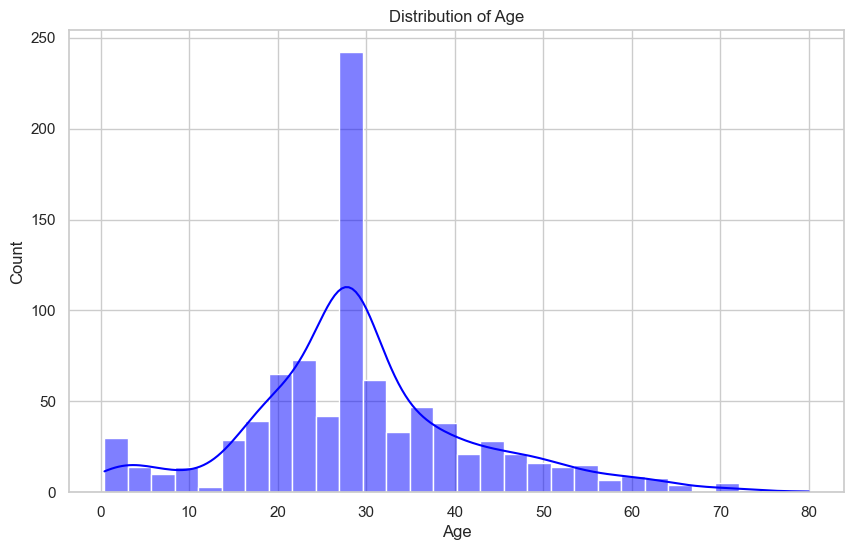

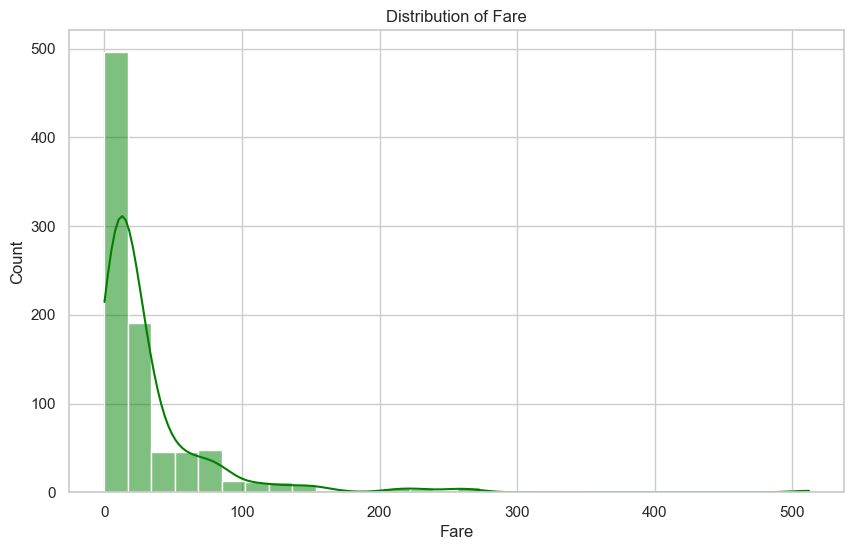

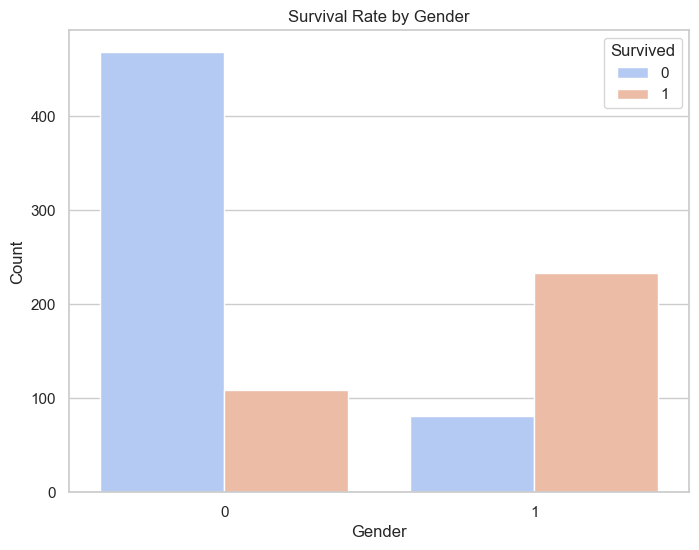

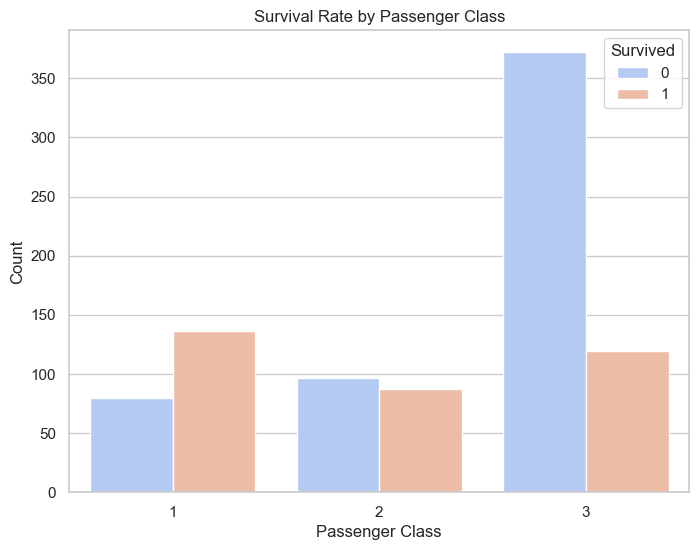

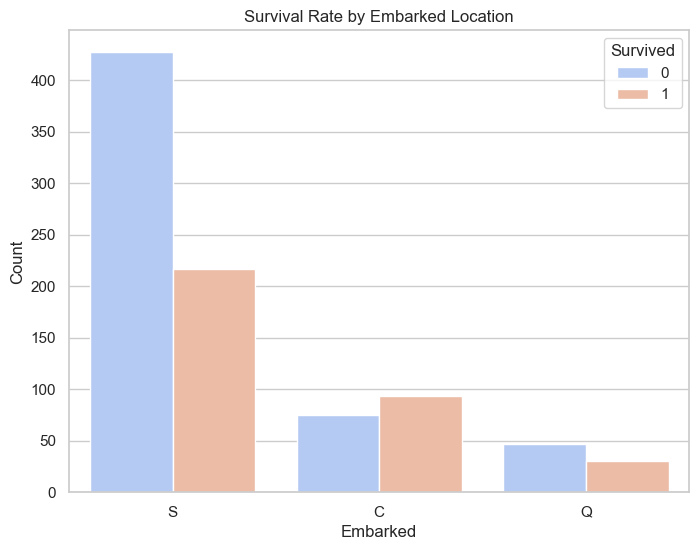

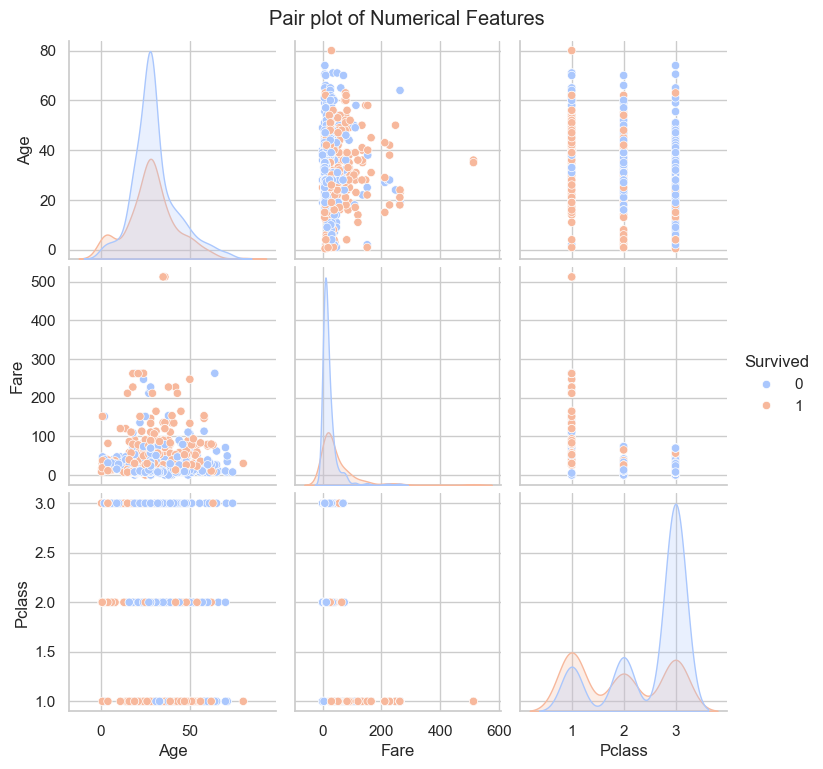

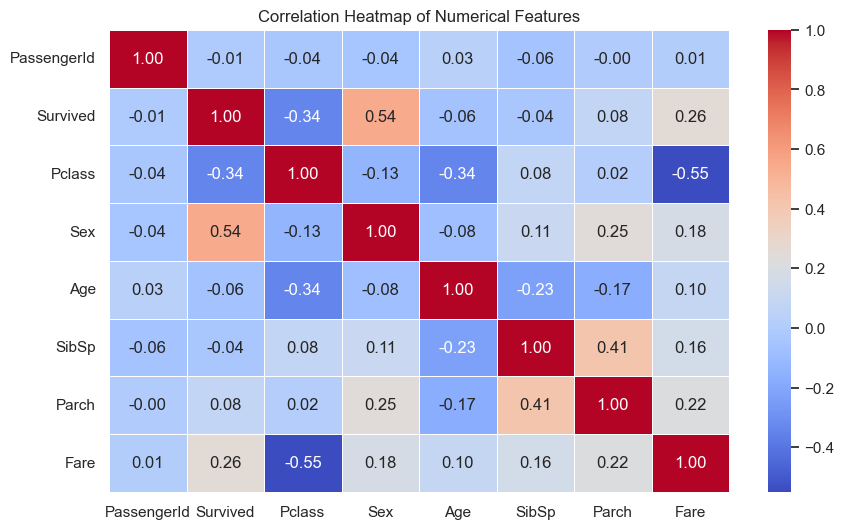

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Distribution of Age (Numerical)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'].dropna(), kde=True, color='blue', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 2. Distribution of Fare (Numerical)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Fare'], kde=True, color='green', bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# 3. Survival Rate by Gender (Categorical: 'Sex')
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Sex', hue='Survived', palette='coolwarm')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 4. Survival Rate by Passenger Class (Categorical: 'Pclass')
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Pclass', hue='Survived', palette='coolwarm')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# 5. Survival Rate by Embarked (Categorical: 'Embarked')
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Embarked', hue='Survived', palette='coolwarm')
plt.title('Survival Rate by Embarked Location')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# 6. Pair plot of numerical features (with 'Survived' as hue)
sns.pairplot(train_data, hue='Survived', vars=['Age', 'Fare', 'Pclass'], palette='coolwarm')
plt.suptitle('Pair plot of Numerical Features', y=1.02)
plt.show()

# 7. Correlation heatmap (only numerical columns)
numerical_data = train_data.select_dtypes(include=['number'])
corr = numerical_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Step 8: Initial Storytelling and Presentation

Based on our exploratory data analysis (EDA), we can make the following key observations:

### 1. Feature Correlations:
- From the **correlation heatmap** and other visualizations, it is clear that **'Pclass'** (passenger class) and **'Fare'** (ticket price) have an impact on survival.
- **1st-class passengers** had a higher survival rate compared to 2nd and 3rd-class passengers. Similarly, passengers who paid higher fares generally had a better chance of surviving.

### 2. Missing Values:
- The dataset had missing values, particularly in the **'Age'** column. We handled these missing values by filling them with the **median age** (since the age distribution is skewed, the median is a reasonable approach).
- The **'Embarked'** column also had some missing values, but these were few and can be handled with imputation or removal if necessary.

### 3. Visualizations and Insights:
- The **survival rate** is **higher among women** than men, as observed in the gender-based count plot. This reflects the "women and children first" policy that was followed during the Titanic disaster.
- **1st-class passengers** had the highest survival rate compared to 2nd and 3rd class passengers. This suggests that wealthier passengers had a higher chance of survival, likely due to better access to lifeboats and quicker evacuation.
- From the **'Pclass'** and **'Embarked'** visualizations, we see that passengers who boarded at **Cherbourg (C)** had a higher survival rate compared to passengers boarding from **Southampton (S)** or **Queenstown (Q)**.

### Summary:
- **Key Predictors of Survival**: Gender (female), passenger class (1st), and fare price are significant factors influencing survival chances.
- **Data Cleaning**: Missing values in the **'Age'** column were handled using the median.
- **Visualization Trends**: The visualizations confirmed some known facts about the Titanic disaster, such as the higher survival rate for women and 1st-class passengers.